In [3]:
import numpy as np
import pandas as pd
import matplotlib
import csv
from seaborn import histplot, pointplot, lineplot
import scipy
import matplotlib.pyplot as plt
from scipy.stats import crystalball
from matplotlib.transforms import Affine2D
import random
import copy
import plotly.graph_objects as go

In [38]:
optical_efficiency = []
minPix = 30
obs = 1

cumulative_count = 0
count = 0
ring_width = []

N = 7
#N_LEN = 8424
cumulative_count = 0
count = 0
k = 0
for i in range(1,7):
    filename = f'/Users/vdk/MST_work/Calculations/muons_16_01_33/values_obs{i}_minPixel{minPix}.txt'
    with open(filename) as file:
        for line in file:
            if count not in drop_count:
                optical_efficiency.append(float(line))
            count += 1
            cumulative_count+=1
            
            
N_LEN = int(len(optical_efficiency)/6)

#print("len = ", count)
#print("cumulative = ", cumulative_count)
optical_efficiency_mean = np.mean(optical_efficiency)
optical_efficiency_std = np.std(optical_efficiency)
relative_uncertainty = (np.std(optical_efficiency)/np.mean(optical_efficiency))*100
print("mean = ", optical_efficiency_mean)
print("std = ", optical_efficiency_std)
print("rel un. = ", relative_uncertainty)
print("len = ", len(optical_efficiency))
#print(optical_efficiency)

mean =  0.28093868193427884
std =  0.026349868140311466
rel un. =  9.37922394982817
len =  6269


0
mean uncertainty =  0.17625291977283697
mean efficiency =  0.28093868193427884


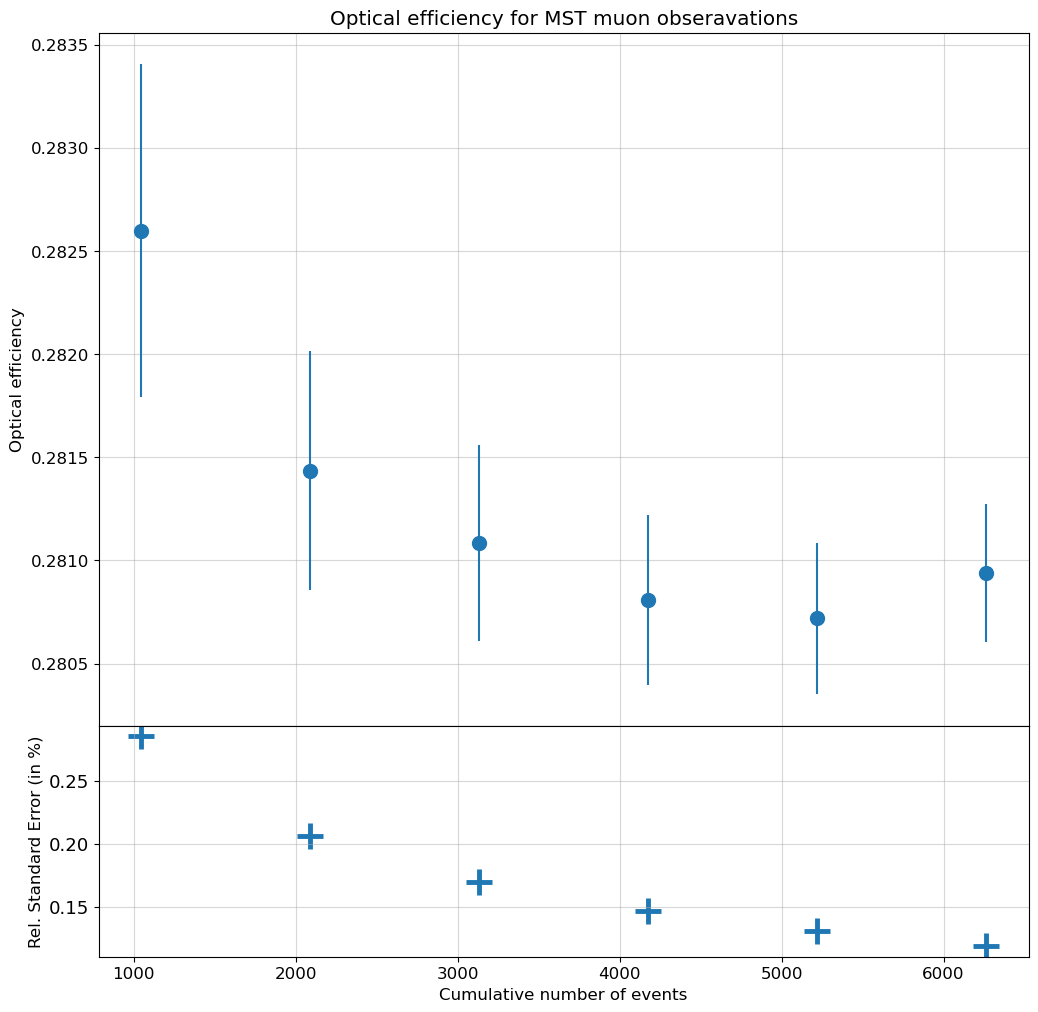

In [43]:
mean_arr = []
std_arr = []
rel_un_arr = []

print(len(drop_count))

for i in range(1,N):
    mean_arr.append(np.mean(optical_efficiency[0:i*N_LEN]))
    std_arr.append(np.std(optical_efficiency[0:i*N_LEN])/(len(optical_efficiency[0:i*N_LEN]))**0.5)
    rel_un_arr.append(((np.std(optical_efficiency[0:i*N_LEN])/(len(optical_efficiency[0:i*N_LEN])**0.5)))/np.mean(optical_efficiency[0:i*N_LEN]))


relative_uncertainty = np.array(rel_un_arr)*100
plt.rcParams.update({'font.size': 12, 'figure.figsize': (12,12)})
events_number = [i*N_LEN for i in range(1,N)]

fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.0)
ax = axes[0]
ax.errorbar(events_number, mean_arr, yerr=std_arr, fmt='o', ms = 10)#, c = 'blue')#, s = 100)#, c= 'black')
#ax.set_title('Optical efficiency together with its relative uncertainty')
ax.set_title(f'Optical efficiency for MST muon obseravations') # minPix>{minPix}') #ring width < 0.25 deg')
ax.set_ylabel('Optical efficiency')
#ax.set_ylim(0.2,0.4)
#ax.set_yticks([0.21,0.25,0.3,0.35, 0.4])
bx = axes[1]
bx.scatter(events_number, relative_uncertainty, marker = '+', s = 350, linewidths = 3.5)#, sharex = ax)#, c = "black")
#bx.annotate('added events from obs901', xy=(5850, 15.7), xytext=(4500, 17), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))
#bx.annotate('added events from obs901', xy=(5550, 15), xytext=(4500, 17), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))

#bx.annotate('events from obs201', xy=(424, 18), xytext=(600, 12), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))
#bx.annotate('events from obs201', xy=(848, 18), xytext=(600, 12), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))
    
bx.set_ylabel("Rel. Standard Error (in %)")
bx.set_xlabel("Cumulative number of events")
#bx.set_ylim(8,10)
#bx.set_title('Relative uncertainty (in %)')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
#bx.set_yticks(['6%'])
bx.tick_params(axis="y", labelsize=13)
print("mean uncertainty = ", np.mean(relative_uncertainty))
print("mean efficiency = ", np.mean(optical_efficiency))
#plt.show()
plt.savefig(f"/Users/vdk/Uncertainty_6obs_MST.png")


In [ ]:
mean_arr = []
std_arr = []
rel_un_arr = []
for i in range(1,N):
    mean_arr.append(np.mean(optical_efficiency[0:i*N_LEN]))
    std_arr.append(np.std(optical_efficiency[0:i*N_LEN]))
    rel_un_arr.append(np.std(optical_efficiency[0:i*N_LEN])/np.mean(optical_efficiency[0:i*N_LEN]))
    #print("len = ", len(optical_efficiency[0:i*N_LEN]))

#print(mean_arr)
#print(std_arr)
#print(rel_un_arr)

In [ ]:
filename = f'/Users/vdk/UncertaintyEstimations/bigdataset/Energy_obs{obs}01_minPixel{minPix}.txt'
energy = []
with open(filename) as file:
    for line in file:
        #optical_efficiency.append(float(i.strip()))
        energy.append(float(line))
        count += 1
        cumulative_count+=1
        #print(float(i.strip()))

print(len(energy))


mean_arr = []
std_arr = []
rel_un_arr = []
for i in range(1,N):
    mean_arr.append(np.mean(energy[0:i*N_LEN]))
    std_arr.append(np.mean(energy[0:i*N_LEN])**0.5)
    rel_un_arr.append((np.mean(energy[0:i*N_LEN])**0.5)/np.mean(energy[0:i*N_LEN]))
    print("len = ", len(energy[0:i*N_LEN]))

#print(mean_arr)
#print(std_arr)
#print(rel_un_arr)

In [ ]:
relative_uncertainty = np.array(rel_un_arr)*100
plt.rcParams.update({'font.size': 22, 'figure.figsize': (12,12)})
events_number = [i*N_LEN for i in range(1,N)]

fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.0)
ax = axes[0]
ax.errorbar(events_number, mean_arr, yerr=std_arr, fmt='o', ms = 10)#, c = 'blue')#, s = 100)#, c= 'black')
#ax.set_title('Optical efficiency together with its relative uncertainty')
ax.set_title('Optical efficiency for obs101 with min pixel>70')
ax.set_ylabel('Optical efficiency')
#ax.set_ylim(0.01,0.4)
bx = axes[1]
bx.scatter(events_number, relative_uncertainty, marker = '+', s = 350, linewidths = 3.5)#, sharex = ax)#, c = "black")
#bx.annotate('added events from obs901', xy=(5850, 15.7), xytext=(4500, 17), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))
#bx.annotate('added events from obs901', xy=(5550, 15), xytext=(4500, 17), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))

#bx.annotate('events from obs201', xy=(424, 18), xytext=(600, 12), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))
#bx.annotate('events from obs201', xy=(848, 18), xytext=(600, 12), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))
    
bx.set_ylabel("Rel. Unc.")
bx.set_xlabel("Cumulative number of events")
#bx.set_ylim(10,20)
#bx.set_title('Relative uncertainty (in %)')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
#bx.set_yticks([11,12,13,14,15,16,17,18,19,20])
bx.tick_params(axis="y", labelsize=13)
#plt.savefig("/Users/vdk/Energy_test.png")

In [ ]:
histplot(energy, stat='count', bins = 300)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlim(0,1)

In [ ]:
print(min(energy))
print(max(energy))

In [ ]:
filename = '/Users/vdk/UncertaintyEstimations/bigdataset_9956Events/Impact_obs101_minPixel70.txt'
impact = []
with open(filename) as file:
    for line in file:
        #optical_efficiency.append(float(i.strip()))
        impact.append(float(line))


mean_arr = []
std_arr = []
rel_un_arr = []
for i in range(1,N):
    mean_arr.append(np.mean(impact[0:i*N_LEN]))
    std_arr.append(np.mean(impact[0:i*N_LEN])**0.5)
    rel_un_arr.append((np.mean(impact[0:i*N_LEN])**0.5)/np.mean(impact[0:i*N_LEN]))

print(mean_arr)
print(min(impact))
print(max(impact))
histplot(impact)
plt.xlabel("impact distance in m")

In [ ]:
relative_uncertainty = np.array(rel_un_arr)*100
plt.rcParams.update({'font.size': 22, 'figure.figsize': (12,12)})
events_number = [i*N_LEN for i in range(1,N)]

fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.0)
ax = axes[0]
ax.errorbar(events_number, mean_arr, yerr=std_arr, fmt='o', ms = 10)#, c = 'blue')#, s = 100)#, c= 'black')
#ax.set_title('Optical efficiency together with its relative uncertainty')
ax.set_title('Impact  for obs101 with min pixel>70')
ax.set_ylabel('Impact')
#ax.set_ylim(0.01,0.4)
bx = axes[1]
bx.scatter(events_number, relative_uncertainty, marker = '+', s = 350, linewidths = 3.5)#, sharex = ax)#, c = "black")
#bx.annotate('added events from obs901', xy=(5850, 15.7), xytext=(4500, 17), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))
#bx.annotate('added events from obs901', xy=(5550, 15), xytext=(4500, 17), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))

#bx.annotate('events from obs201', xy=(424, 18), xytext=(600, 12), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))
#bx.annotate('events from obs201', xy=(848, 18), xytext=(600, 12), color= 'red', size = 15,
            #arrowprops=dict(facecolor='orange', shrink=0.005))
    
bx.set_ylabel("Rel. Unc.")
bx.set_xlabel("Cumulative number of events")
#bx.set_ylim(10,20)
#bx.set_title('Relative uncertainty (in %)')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
#bx.set_yticks([11,12,13,14,15,16,17,18,19,20])
bx.tick_params(axis="y", labelsize=13)
plt.savefig("/Users/vdk/Impact_test.png")

In [ ]:
filename = '/Users/vdk/UncertaintyEstimations/bigdataset_9956Events/ImpactXY_obs101_minPixel70.txt'
xy = []
with open(filename) as file:
    for line in file:
        xy.append(line.strip())

xy = np.array([i.split(" ") for i in xy])
impact_x = xy[:,0]
impact_y = xy[:,1]
impact_x = [float(i) for i in impact_x]
impact_y = [float(i) for i in impact_y]
print(min(impact_x), max(impact_x))
print(min(impact_y), max(impact_y))

In [ ]:
#plt.scatter(impact_x,impact_y)
bin_size = 100
ax = plt.gca()
#plt.figure(figsize = (25,13))
ax.hist2d(impact_x, impact_y, bins=(bin_size, bin_size), norm=matplotlib.colors.LogNorm(), cmap='viridis')#plt.cm.jet)
#plt.plot([-0.5,-1,-0.5, 0.5, 1, 0.5, -0.5],[-1,0,1,1,0, -1, -1], color = 'red', linewidth = 5)
circle2 = plt.Circle((0, 0), 12, color='r', fill=False, linewidth = 2,label = 'mirror')
ax.add_patch(circle2)
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)

PCM=ax.get_children()[0]
plt.colorbar(PCM, ax=ax)
plt.legend()
print('s')
#seaborn.hist2d(impact_x,impact_y)

In [ ]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
ax.hist2d(impact_x, impact_y, bins=(bin_size, bin_size), norm=matplotlib.colors.LogNorm(), cmap='viridis')#plt.cm.jet)
#plt.plot([-0.5,-1,-0.5, 0.5, 1, 0.5, -0.5],[-1,0,1,1,0, -1, -1], color = 'red', linewidth = 5)
circle2 = plt.Circle((0, 0), 12, color='r', fill=False, linewidth = 2,label = 'mirror')
ax.add_patch(circle2)
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)

PCM=ax.get_children()[0]
plt.colorbar(PCM, ax=ax)
plt.legend()


In [ ]:
filename = '/Users/vdk/UncertaintyEstimations/bigdataset/DirectionMuon_obs101_minPixel70.txt'
xy = []
with open(filename) as file:
    for line in file:
        xy.append(line.strip())

xy = np.array([i.split(" ") for i in xy])
fov_lon = xy[:,0]
fov_lat = xy[:,1]
fov_lon = [float(i) for i in impact_x]
fov_lat = [float(i) for i in impact_y]
print(min(impact_x), max(impact_x))
print(min(impact_y), max(impact_y))
center_distance = [(i**2 + j**2)**0.5 for i,j in fov_lon,fov_lat]

In [ ]:
N = 40
N_LEN = 8424
cumulative_count = 0
count = 0
ring_width = []

for i in range(1,41):
        #filename = f'/Users/vdk/UncertaintyEstimations/bigdataset_40Obs/Width_obs{i}01_minPixel{minPix}.txt'
        filename = f'/Users/vdk/UncertaintyEstimations/bigdataset_40Obs100minPixel/Width_obs{i}01_minPixel{minPix}.txt'
        with open(filename) as file:
            for line in file:
                if float(line) < 0.15:
                    ring_width.append(float(line))
                    cumulative_count+=1
            count += 1
                

print('1',len(ring_width))
print('2',cumulative_count)
bad_width = []
x_values = [i for i in range(cumulative_count)]

for i,j in enumerate(ring_width):
    if j >= 100:
        bad_width.append(i)
        print(j)

#print(len(ring_width))
#print(bad_width)




plt.rcParams.update({'font.size': 12, 'figure.figsize': (6,6)})
plt.figure(figsize=(12,8))
plt.scatter(x_values, ring_width)
plt.ylim()
plt.grid()

#plt.yticks([0,0.5, 1,2,4,6,8,10,12])

plt.xlabel("Events")
plt.ylabel("Degrees")
plt.title("Ring width")
print(np.mean(ring_width))
#plt.savefig(f"/Users/vdk/RingWidth_obs101.png")

In [ ]:
mean_arr = []
std_arr = []
rel_un_arr = []
for i in range(1,N):
    mean_arr.append(np.mean(ring_width[0:i*N_LEN]))
    std_arr.append(np.std(ring_width[0:i*N_LEN]))
    rel_un_arr.append(np.std(ring_width[0:i*N_LEN])/np.mean(ring_width[0:i*N_LEN]))
    #print("len = ", len(optical_efficiency[0:i*N_LEN]))

print(mean_arr)
print(std_arr)
print(rel_un_arr)
relative_uncertainty = np.array(rel_un_arr)*100
plt.rcParams.update({'font.size': 12, 'figure.figsize': (6,6)})
events_number = [i*N_LEN for i in range(1,N)]

fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.0)
ax = axes[0]
ax.errorbar(events_number, mean_arr, yerr=std_arr, fmt='o', ms = 10)#, c = 'blue')#, s = 100)#, c= 'black')
#ax.set_title('Optical efficiency together with its relative uncertainty')
ax.set_title('Mean ring width for obs101')
ax.set_ylabel('Mean ring width [deg]')
ax.set_ylim(0.01,0.2)
bx = axes[1]
bx.scatter(events_number, relative_uncertainty, marker = '+', s = 350, linewidths = 3.5)
bx.set_ylabel("Rel. Unc.")
bx.set_xlabel("Cumulative number of events")
bx.set_ylim(0,100)
#bx.set_title('Relative uncertainty (in %)')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
#bx.set_yticks([11,12,13,14,15,16,17,18,19,20])
bx.tick_params(axis="y", labelsize=13)
#plt.savefig("/Users/vdk/MeanRingWidth_obs101.png")

In [ ]:
filename1 = '/Users/vdk/UncertaintyEstimations/bigdataset_40obsFull/Completeness_obs101_minPixel70.txt'
count = 0
for i in range(1,41):
        filename = f'/Users/vdk/UncertaintyEstimations/bigdataset_40obsFull/Completeness_obs{i}01_minPixel{min_pix}.txt'
        with open(filename) as file:
            for line in file:
                ring_width.append(float(line))
                cumulative_count+=1
            count += 1
completeness = []
count = 0
check = 6360
with open(filename1) as file:
    for line in file:
        completeness.append(line)
        #print(count)
        #print(line)
        if count == check:
            print(line)
        count += 1

completeness = [float(i) for i in completeness]

filename2 = '/Users/vdk/UncertaintyEstimations/bigdataset_40obsFull/Containment_obs101_minPixel70.txt'
count = 0
for i in range(1,41):
        filename = f'/Users/vdk/UncertaintyEstimations/bigdataset_40obsFull/Containment_obs{i}01_minPixel{min_pix}.txt'
        with open(filename) as file:
            for line in file:
                ring_width.append(float(line))
                cumulative_count+=1
            count += 1

containment = []
count = 0
with open(filename2) as file:
    for line in file:
        containment.append(line)
        if count == check:
            print(line)
        count += 1
        
containment = [float(i) for i in containment]

plt.rcParams.update({'font.size': 12, 'figure.figsize': (12,12)})
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,5))
axes[0].scatter(x_values, completeness)#, ax = axes[0])
axes[1].scatter(x_values, containment)#, ax = axes[1])
axes[0].set_xlabel('Events')
axes[1].set_xlabel('Events')
axes[0].set_title("Ring completeness")
axes[1].set_title("Ring containment")
axes[0].grid()
axes[1].grid()

In [ ]:
filename1 = '/Users/vdk/UncertaintyEstimations/bigdataset_40obsFull/Completeness_obs101_minPixel70.txt'
count = 0
completeness = []
bad_comp = []
for i in range(1,41):
        filename = f'/Users/vdk/UncertaintyEstimations/bigdataset_40obsFull/Completeness_obs{i}01_minPixel{min_pix}.txt'
        with open(filename) as file:
            for line in file:
                completeness.append(float(line))
                if float(line) < 0.8:
                    pass
                    #bad_comp.append(count)
                cumulative_count+=1
            count += 1


for i,j in enumerate(completeness):
    if j < 0.5:
        bad_comp.append(i)
print(bad_comp)
        
count = 0
check = 6360
with open(filename1) as file:
    for line in file:
        completeness.append(line)
        #print(count)
        #print(line)
        if count == check:
            print(line)
        count += 1

completeness = [float(i) for i in completeness]

filename2 = '/Users/vdk/UncertaintyEstimations/bigdataset_40obsFull/Containment_obs101_minPixel70.txt'
count = 0
for i in range(1,41):
        filename = f'/Users/vdk/UncertaintyEstimations/bigdataset_40obsFull/Containment_obs{i}01_minPixel{min_pix}.txt'
        with open(filename) as file:
            for line in file:
                ring_width.append(float(line))
                cumulative_count+=1
            count += 1

containment = []
count = 0
with open(filename2) as file:
    for line in file:
        containment.append(line)
        if count == check:
            print(line)
        count += 1
        
containment = [float(i) for i in containment]

plt.rcParams.update({'font.size': 12, 'figure.figsize': (12,12)})
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,5))
axes[0].scatter(x_values, completeness)#, ax = axes[0])
axes[1].scatter(x_values, containment)#, ax = axes[1])
axes[0].set_xlabel('Events')
axes[1].set_xlabel('Events')
axes[0].set_title("Ring completeness")
axes[1].set_title("Ring containment")
axes[0].grid()
axes[1].grid()